## Table of Contents

1. ) [Introduction](#Overview)
2. ) [Analysis](#Analysis)
3. ) [Results](#Results)
4. ) [Conclusions](#Conclusions)

# Introduction

## Problem Statement

March Madness is one of the most popular offseasons in college sports. Many people heavily rely upon seed to select their winners in March Madness. In this notebook, the dataset will be explored for interesting historical revelations.

## Data Background

Mainly focusing on comparing teams and assigning status as underdog based on seed. This is to cover the potential error that might arise from assigning every team a ranking discrete overall ranking.
Thus when same seed teams play we discard this as of interest for the analysis

Data was obtained from https://data.world/sports/ncaa-mens-march-madness/workspace/filefilename=NCAA+Mens+March+Madness+Historical+Results.csv


This data only spans 1985, the beginning of current era March Madness, to 2016. 
In future revisions this data will be manually scraped to stay up to date

**Notes**: 
* Seed is inversely related to good teams 
    * higher seed is lower ranking
    * 1 seed is the best seed

### Importing 

In [1]:
# Import the necessary Python libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.dates as mdates
from datetime import datetime


# ignore warnings
import warnings 
warnings.filterwarnings("ignore")

renamed CSV from "NCAA Mens March Madness Historical Results.csv" to "March_Madness_Games.csv"

In [2]:
mm_df= pd.read_csv("March_Madness_Games.csv")
mm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2050 non-null   object
 1   Round          2050 non-null   object
 2   Region         2038 non-null   object
 3   Winning Seed   2050 non-null   int64 
 4   Winner         2050 non-null   object
 5   Winning Score  2050 non-null   int64 
 6   Losing Seed    2050 non-null   int64 
 7   Loser          2050 non-null   object
 8   Losing Score   2050 non-null   int64 
 9   Overtime       130 non-null    object
dtypes: int64(4), object(6)
memory usage: 160.3+ KB


Print first 5 lines

In [3]:
mm_df.head() 

,Date,Round,Region,Winning Seed,Winner,Winning Score,Losing Seed,Loser,Losing Score,Overtime
0,3/14/85,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN
1,3/14/85,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN
2,3/14/85,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN
3,3/14/85,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN
4,3/14/85,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN


## Data Cleaning

Testing Code: Saved for the developer

In [4]:
#Testing (save for .py version)
# date_time_str= (mm_df["Date"][0])
# date_time_obj = datetime.strptime(date_time_str, '%m/%d/%y')
# date_time_str

Convert String to DateTime Object

Modify several Columns within the Dataframe. Note: Play-in games only started in 2001. As these games are not significant we are excluding them from our Data

In [5]:
#Convert String to DateTime Object
mm_df["Date"]= pd.to_datetime(mm_df['Date'], format='%m/%d/%y').dt.date

#Create Year Variable
mm_df['Year'] = pd.DatetimeIndex(mm_df['Date']).year 

#Create Total Points per game (not including OT) Variable
mm_df["Total Score"]= mm_df["Winning Score"]+ mm_df["Losing Score"]

###Detect Cases where underdog wins (Save for .py version)
# mm_df["Underdog Wins"]= mm_df["Winning Seed"] < 

#Exclude all play in games (11, 12, 16, in Opening Round)
#PLAY IN GAMES ONLY STARTED IN 2001
not_playin_game= mm_df["Round"] != "Opening Round"

#Create Variable Underdog
# detect when lower seed wins; when same seed ignore (or later could look up ranking of that year and pick based on higher team ranked)
total_games= len(mm_df)
# mm_df[mm_df["Winning Seed"] > mm_df["Losing Seed"]]
mm_df["Underdog"]= mm_df["Winning Seed"] > mm_df["Losing Seed"]


In [6]:
#Create Seed Differential Variable to express the number of seeds between losing and winning teams. A negative represents a lower seeded team
#total difference in seeds between teams
mm_df["Seed Differential"]= mm_df["Winning Seed"]- mm_df["Losing Seed"]


The following is more testing code for the developer

In [7]:
# mm_df[mm_df["Seed Differential"]==]
#mm_df.loc[(mm_df['Winning Seed'] == 1) & (mm_df['Losing Seed'] == 1)]



The following removes games where there is no underdog

In [8]:
#remove same seed games (number of same seed games)
mm_df[mm_df["Winning Seed"]== mm_df["Losing Seed"]]

#temporarily remove same Seed games
diff_seed= mm_df["Winning Seed"]!= mm_df["Losing Seed"]
mm_df= mm_df[diff_seed]

More testing:

In [9]:

#Testing (Save for .py version later)
#CHECK LEN IS DIFFERENT
# print(len(mm_df[not_playin_game]) != len(mm_df))
# mm_df= mm_df[not_playin_game] # len(mm_df)
#check that all have been removed
# check= mm_df["Round"] == "Opening Round"
# mm_df[check]

### Completed Dataset

## Variable Examination

In [10]:
#Listing Final Variables
col_name = mm_df.columns.values.tolist()
col_name

['Date',
 'Round',
 'Region',
 'Winning Seed',
 'Winner',
 'Winning Score',
 'Losing Seed',
 'Loser',
 'Losing Score',
 'Overtime',
 'Year',
 'Total Score',
 'Underdog',
 'Seed Differential']

*** Underdog is the most important variable we have to focus on. This is true when the lower seed team has won and false when not. We have already removed all same seed games from out dataset

# Analysis

### Step 1: Total Results

In [15]:
#Percentage of lower seed/ underdog winning
underdog_wins= len(mm_df[mm_df["Winning Seed"] > mm_df["Losing Seed"]])
underdog_pct= underdog_wins/ total_games
favorited_wins= total_games- underdog_wins
per_fav_win =favorited_wins/len(mm_df)

print(f"The expected team won {per_fav_win:.2%} percent of the games")

The expected team won 74.65% percent of the games-- based on our criteria


### Step 2: Seed Differentials:

To ease our understanding of the performance of Underdog winners, we will split the data into <u>Seed Differentials</u>

*what does this mean???*

A <u>Seed Differentials</u> is just the difference in seeds that was in place when an Underdog team won. For example, a 4 seed beating a 1 seed would have a seed differential of 3. This is just a rote way to capture what the difference is in games. 

In [16]:
underdog_df= mm_df[mm_df["Underdog"]== True]
underdog_df

# underdog_df[underdog_df["Seed Differential"]]
underdog_df["Seed Differential"].value_counts()
underdog_df["Seed Differential"].describe()
pre_list= list(underdog_df["Seed Differential"])

category_dict= {}

for diff in pre_list:
    cat_val= None
    if diff<4:
        cat_val= "1-3 Seed Difference"
    elif diff>3 and diff<7:
        cat_val= "4-6 Seed Difference"
    elif diff>6 and diff<10:
        cat_val= "7-9 Seed Difference"
    elif diff>9:
        cat_val= "10-13 Seed Difference"

    if not cat_val in category_dict:
        category_dict[cat_val]= 0
    category_dict[cat_val]+= 1
    
stor_val= sum(category_dict.values())
category_dict= {k:v/(stor_val) for (k,v) in category_dict.items()}
(category_dict)

# category_dict= {}
# for val in category_list:
    
#<1-3; 4-6,7-9; 10-13

# underdog_df["Seed Differential"].value_counts()
# mm_df[mm_df["Seed Differential"]== 13]

{'1-3 Seed Difference': 0.4920071047957371,
 '4-6 Seed Difference': 0.19005328596802842,
 '7-9 Seed Difference': 0.261101243339254,
 '10-13 Seed Difference': 0.056838365896980464}

The interpretation of this dictionary is that teams with a 1-3 seed difference have the highest winning percentage at 49.2%, followed by teams with a 7-9 seed difference at 26.1%, teams with a 4-6 seed difference at 19.0%, and teams with a 10-13 seed difference at 5.7%.

###### Meaning:

This suggests that the seed difference between two teams is a significant factor in determining their likelihood of winning a game in the NCAA basketball tournament. Teams with a smaller seed difference, particularly those with a 1-3 seed difference, have a higher chance of winning compared to teams with a larger seed difference. However, it is important to note that other factors, such as team performance and player injuries, can also influence the outcome of a game.

### Step 2: Victory Differences

The following graph is used to visualize, the percentages of Seed Differential within the bigger picture of how often the lower seed wins overall

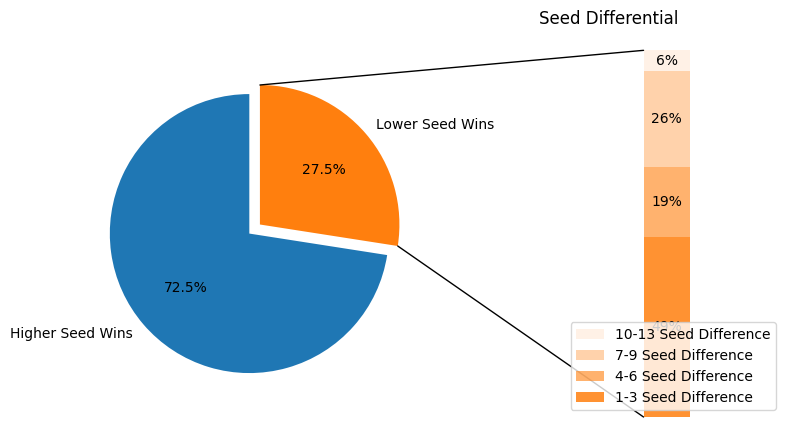

In [19]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters

overall_ratios = sizes = [favorited_wins, underdog_wins]
labels = "Higher Seed Wins", "Lower Seed Wins"
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -90 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
### Seed of the underdog


# underdog
# divide the seed differential from the total

age_ratios = category_dict.values()
age_labels =  category_dict.keys()
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C1', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Seed Differential')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 5 * width, 2.5 * width)

###DRAWING LINES

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[1].theta1, wedges[1].theta2
center, r = wedges[1].center, wedges[1].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()


In this plot, the conjoined chart (right) represents the difference among lower seed teams

This code generates a graph that shows the winning percentages for higher-seeded and lower-seeded teams in the NCAA basketball tournament. The left side of the graph is a pie chart that shows the overall percentage of wins for higher-seeded and lower-seeded teams. The right side of the graph is a bar chart that shows the percentage of wins for each seed difference (the difference in seeding between two teams).

The pie chart and bar chart are connected by lines that show the relationship between the overall winning percentages and the winning percentages for each seed difference. The pie chart and bar chart help to visualize which teams are more likely to win based on their seeding.

This graph can be helpful to understand how seeding affects the likelihood of a team winning a game in the NCAA basketball tournament.





#### Lowest Seed teams to win (*)

In [ ]:
largest_upset= underdog_df["Seed Differential"].max()
seed_15= underdog_df[mm_df["Seed Differential"]== largest_upset]
seed_15

*As of 2018, there is 1 16-seed team win in March Madness, UMBC.

In [ ]:

names= list(seed_15["Winner"])
names[-1]= "MTSU"
dates= list(seed_15["Date"])

# names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
#              'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
#              'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
#              'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

# dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
#              '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
#              '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
#              '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
#              '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
#              '2014-10-26', '2014-10-18', '2014-08-26']

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Underdog Wins")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
# ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [ ]:
#Plotting
# total underdog win ratio per season
# total underdog per round
# among the top 4 seeds which is most likely to lose?

# ratio of their appearances
underdog_frame= mm_df[["Winner", "Underdog"]].groupby("Winner").sum().sort_values(["Underdog"], ascending= False).head(10)

test= underdog_frame["Underdog"]
                                
input_val= dict(test)

underdog_frame


# Teams with the Most Underdog Wins

In [ ]:
# Bar chart and then show years too
# Show the seeds they've won as underdogs

fig, ax = plt.subplots()

teams = input_val.keys()
counts = input_val.values()
bar_colors = ['tab:orange', 'tab:red', "tab:purple", 'tab:blue']

ax.bar(teams, counts,  color=bar_colors)

ax.set_ylabel('Underdog Wins')
ax.set_title('Top 10 Teams with the Most Underdog Wins')
ax.tick_params(axis='x', rotation=50)

# ax.legend(title='Fruit color')

plt.show()


## then Gather data on the team (timeline

In [ ]:
year_frame= mm_df[["Date", "Region", "Underdog"]] #farthest underdogs per year

underdog_frame= mm_df[["Winner", "Underdog"]].groupby("Winner").sum().sort_values(["Underdog"], ascending= False).head(10)
underdog_frame

# Most Successful Underdogs

In [ ]:
#display teams in order of round

temp= mm_df.loc[(mm_df['Underdog'] == True) & (mm_df['Round'] == "National Championship")]
temp.sort_values("Winning Seed", ascending= False)

Many of the underdogs here are trivial, as it was only a difference of 1 seed. 
However, Villanova is the lowest underdog seed to ever win a national championship and they were also the first team in the modern era of March Madness to win.

# Conclusions

* **Overall**
    * While the underdog is more likely to lose in general almost a quarter of the time, there is undeniably a high enough presence of "Underdogs" winning to warrant excitement.
* **Ultimate Underdog Team**
    * Villonova is the ultimate underdog team having both the underdog wins and the biggest underdog championship


## Next Steps

* Add more depth to the Underdog Criteria
    * Look at how teams in different Regions are ranked against each other in overall rankings to decide when a team is an underdog even though both teams are the same seeds across different regions
* Further Explore underdog teams
Evaluate more fine-grained variables involving the teams